In [1]:
import pandas as pd
import numpy as np
import csv
import pca
from sklearn.decomposition import PCA
from pca_utils import plot_widget
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py

C:\Users\Nathan\AppData\Local\Temp\ipykernel_6312\190038703.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
py.init_notebook_mode()
output_notebook()

Loading BokehJS ...

In [3]:
## Using PCA in Exploratory Data Analysis

In [4]:
#process all data into matrixs

with open('C:/Users/Nathan/Desktop/Computer Class/DeepLearning.AI/ML project/DC link to scrap/X control.csv', 'r') as f:
    reader = csv.reader(f)
    headers = next(reader, None)
    data = list(reader)
X_raw = np.array(data, dtype=float)

with open('C:/Users/Nathan/Desktop/Computer Class/DeepLearning.AI/ML project/DC link to scrap/y dirt.csv', 'r') as f2:
    reader2 = csv.reader(f2)
    headers2 = next(reader2, None)
    data2 = list(reader2)
y_raw = np.array(data2, dtype=float)

len = X_raw.shape[0]
col = X_raw.shape[1]
print(X_raw.shape)
print(y_raw.shape)

(24635, 12)
(24635, 1)


In [5]:
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(X_raw)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])

In [6]:
df_pca.head()

principal_component_1  principal_component_2
0             226.829877              34.993269
1             156.907699              -0.944857
2             195.526154              26.565025
3              74.944434              39.084890
4             113.254912              23.885304

Text(0.5, 1.0, 'PCA decomposition')

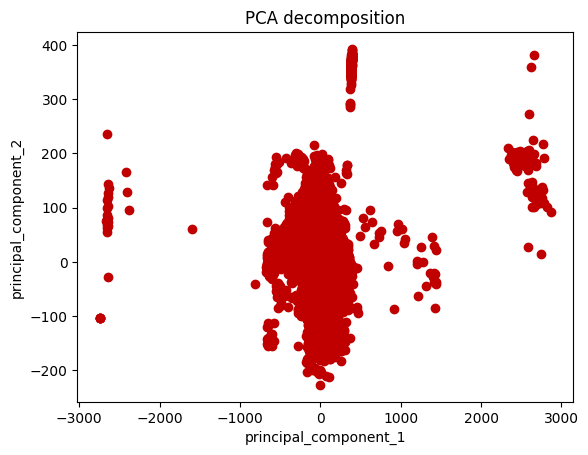

In [7]:
plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [8]:
# pca.explained_variance_ration_ returns a list where it shows the amount of variance explained by each principal component.
sum(pca.explained_variance_ratio_)

0.926261472973484

In [9]:
pca_3 = PCA(n_components = 3).fit(X_raw)
X_t = pca_3.transform(X_raw)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [10]:
import plotly.express as px

In [11]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()

In [12]:
sum(pca_3.explained_variance_ratio_)

0.9766372213869842

Text(0.5, 1.0, 'PCA decomposition')

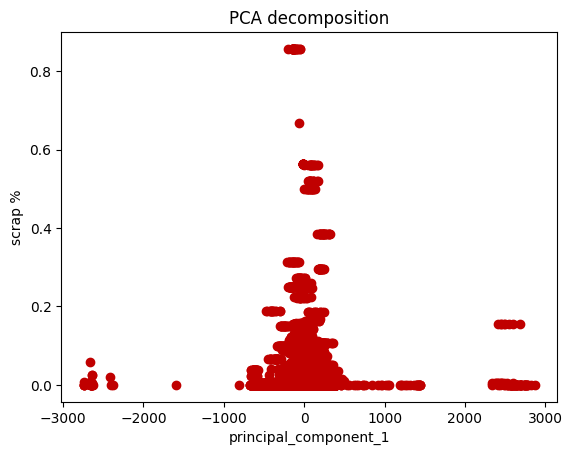

In [13]:
#use PCA to compile X into 1 term, plot vs scrap %
pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X_raw)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1'])

plt.scatter(df_pca['principal_component_1'],y_raw,color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('scrap %')
plt.title('PCA decomposition')

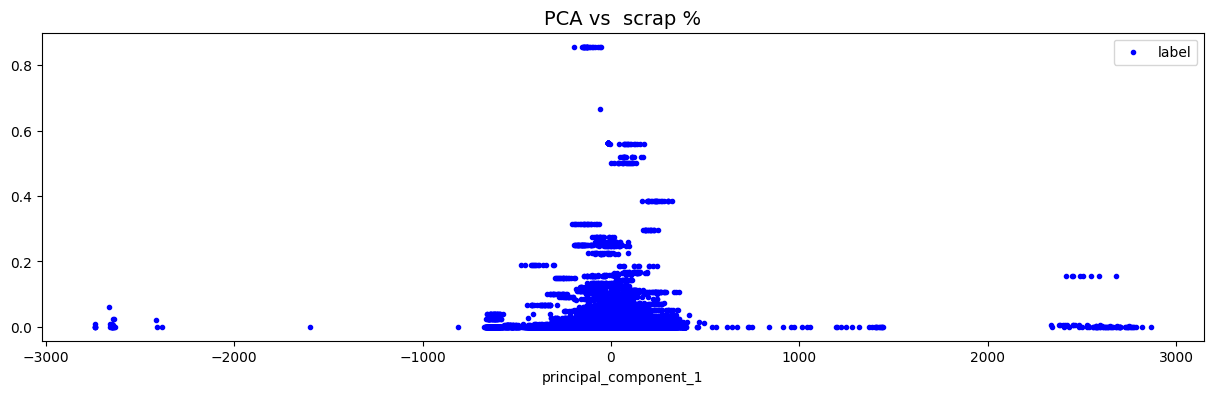

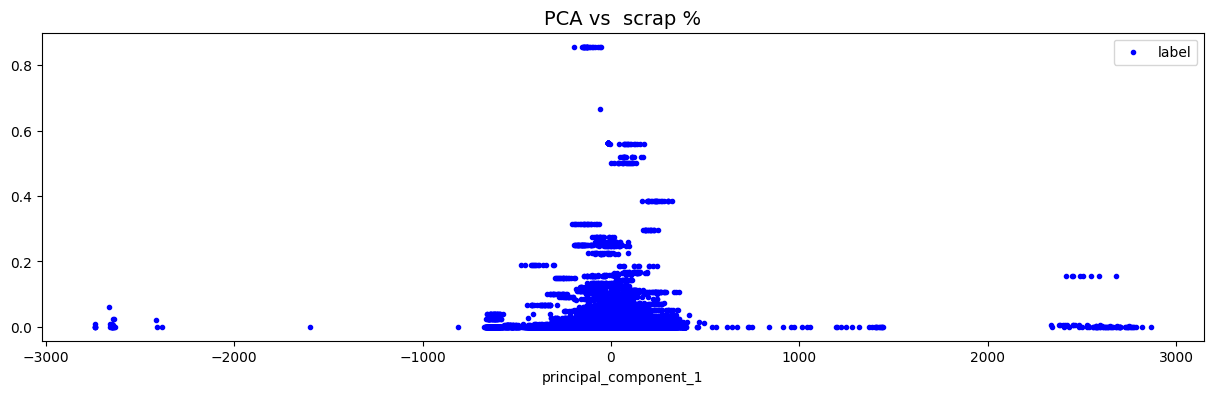

In [36]:
fig_, ax_ = plt.subplots(figsize=(15,4))
ax_.set_title(f"PCA vs  scrap %",fontsize = 14)
ax_.set_xlabel("principal_component_1")
    
ax_.scatter(df_pca['principal_component_1'], y_raw, label='label', color='b', linestyle='None', marker = ".")
#ax_.plot(y_test , label='actual Values', color='g', linestyle='None', markersize = 3.0, marker = "x")
#ax_.plot(test, label='Predicted - actual', color='b', linestyle='None', markersize = 3.0, marker = "o")
ax_.legend()



In [19]:
#df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objs as go

fig = make_subplots(rows=1, cols=2, specs = [[{"type":"scatter3d"}, {"type":"scatter"}]])
fig.add_trace(go.Scatter3d(x= df_pca_3['principal_component_1'], 
                  y = df_pca_3['principal_component_2'], 
                  z = df_pca_3['principal_component_3'], 
                  mode = 'markers'),
                  row = 1,
                  col = 1
                    ).update_traces(marker = dict(color = "#C00000", symbol = "x", size = 2),
                                    ).update_layout(scene = dict(xaxis = dict(range = [-1.5,1.5], showgrid=False),
                                                                 xaxis_title = 'x1',
                                                                 yaxis = dict(range = [-1.5,1.5], showgrid = False),
                                                                 yaxis_title = 'x2',
                                                                 zaxis = dict(range = [-1.5,1.5], showgrid = False),
                                                                 zaxis_title = 'x3'))

fig.add_trace(go.Scatter(x = df_pca_3.rename(columns = {'x1':'z1'})['z1'],
                         y = df_pca_3.rename(columns = {'x2':'z2'})['z2'],
                         mode = "markers",
                         showlegend=False
                        ),
                row = 1,
                col = 2)

IndentationError: unexpected indent (2073288593.py, line 22)

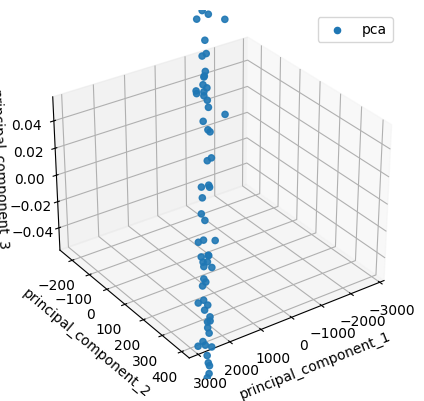

In [34]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')
x = df_pca_3['principal_component_1']
y = df_pca_3['principal_component_2']
zs = df_pca_3['principal_component_3']
ax.scatter(x, y, zs=0, zdir='y', label='pca')

# Make legend, set axes limits and labels
ax.legend()
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
#ax.set_zlim(0, 1)
ax.set_xlabel('principal_component_1')
ax.set_ylabel('principal_component_2')
ax.set_zlabel('principal_component_3')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=30., azim=55, roll=00)

plt.show()

In [25]:
df_pca_3.head()

principal_component_1  principal_component_2  principal_component_3
0             226.829877              34.993269               9.054711
1             156.907699              -0.944857             -37.143390
2             195.526154              26.565025               9.785843
3              74.944434              39.084890              25.831639
4             113.254912              23.885304              -6.104502

In [ ]:
fig_, ax_ = plt.subplots(figsize=(15,6))
ax_.set_title(f"PCA vs  scrap %",fontsize = 14)
ax_.set_xlabel("principal_component_1")
    
ax_.scatter(df_pca_3['principal_component_1'], y_raw, label='label', color='b', linestyle='None', marker = ".")
#ax_.plot(y_test , label='actual Values', color='g', linestyle='None', markersize = 3.0, marker = "x")
#ax_.plot(test, label='Predicted - actual', color='b', linestyle='None', markersize = 3.0, marker = "o")
ax_.legend()

fig_, ax_ = plt.subplots(figsize=(15,15))
ax_.set_title(f"PCA vs  scrap %",fontsize = 14)
ax_.set_xlabel("principal_component_2")
    
ax_.scatter(df_pca_3['principal_component_2'], y_raw, label='label', color='b', linestyle='None', marker = ".")
#ax_.plot(y_test , label='actual Values', color='g', linestyle='None', markersize = 3.0, marker = "x")
#ax_.plot(test, label='Predicted - actual', color='b', linestyle='None', markersize = 3.0, marker = "o")
ax_.legend()

fig_, ax_ = plt.subplots(figsize=(15,15))
ax_.set_title(f"PCA vs  scrap %",fontsize = 14)
ax_.set_xlabel("principal_component_3")
    
ax_.scatter(df_pca_3['principal_component_3'], y_raw, label='label', color='b', linestyle='None', marker = ".")
#ax_.plot(y_test , label='actual Values', color='g', linestyle='None', markersize = 3.0, marker = "x")
#ax_.plot(test, label='Predicted - actual', color='b', linestyle='None', markersize = 3.0, marker = "o")
ax_.legend()